<a href="https://colab.research.google.com/github/willycoy/Violencia_Tunja/blob/main/Casos_Violencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CASOS DE VIOLENCIA CONTRA LA MUJER EN TUNJA

**OpenRefine**

Modificacion de la columna *FECHA_ DE_ LA_ DENUNCIA*
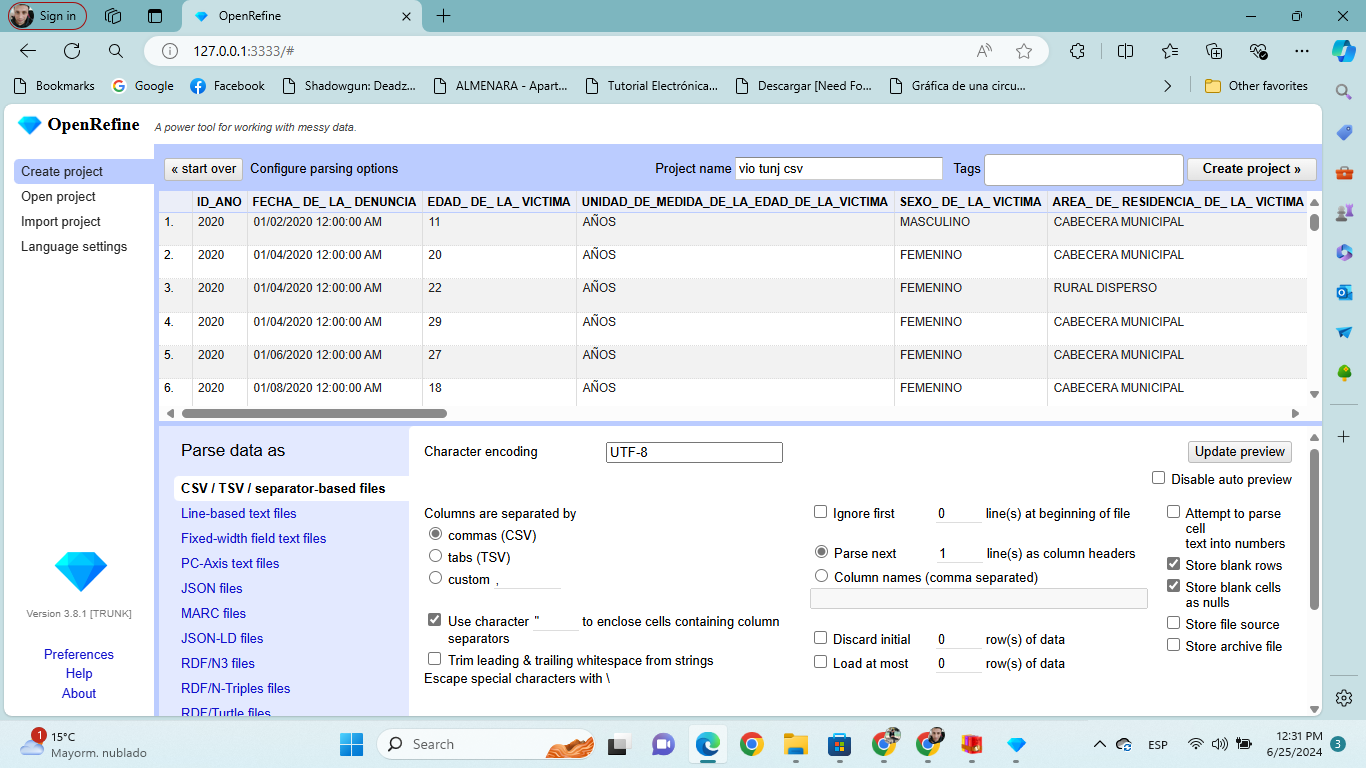

Editar la columna **FECHA_ DE_ LA_ DENUNCIA** en columna **FECHA dd/mm/aa**

**Comando**: *value.split(" ")[0]*, el cual selecciona la primera cadena antes de un especio

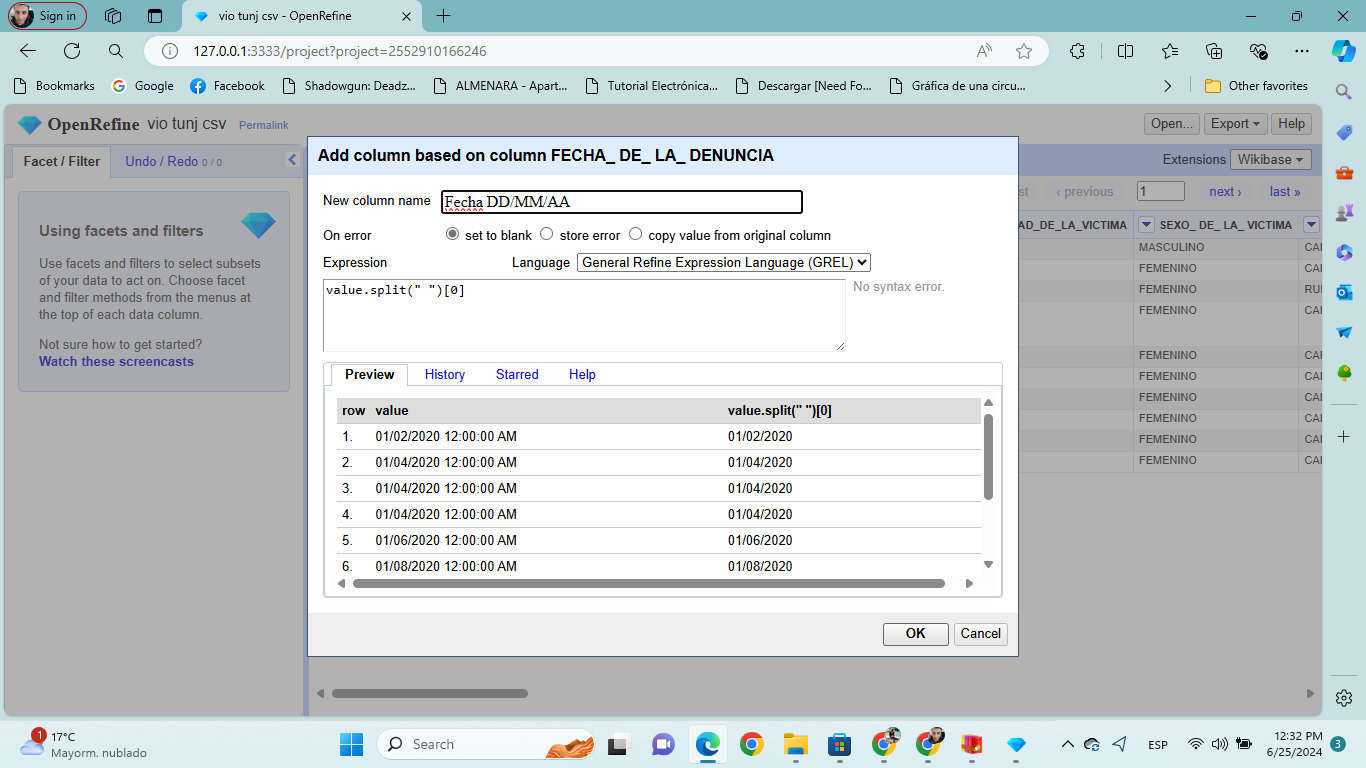

Editar la columna **FECHA_ DE_ LA_ DENUNCIA** en columna HORA

**Comando:** *value.split(" ")[1] + " " + value.split(" ")[2]*, el cual selecciona la segunda y tercera cadena despues del primer especio.

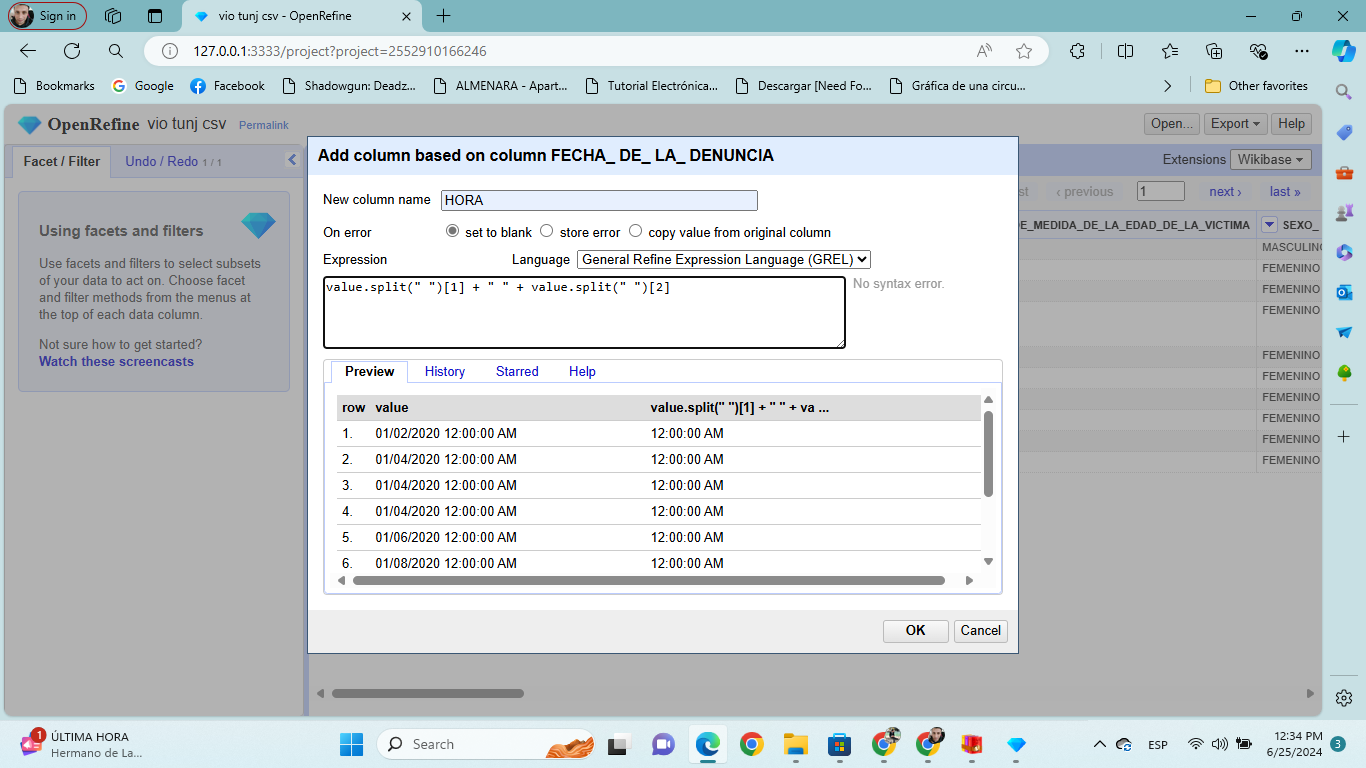

**DataFrame Final**

*con la adición de unas nuevas columnas llamadas:*

***FECHA DD/MM/AA**

***HORA**

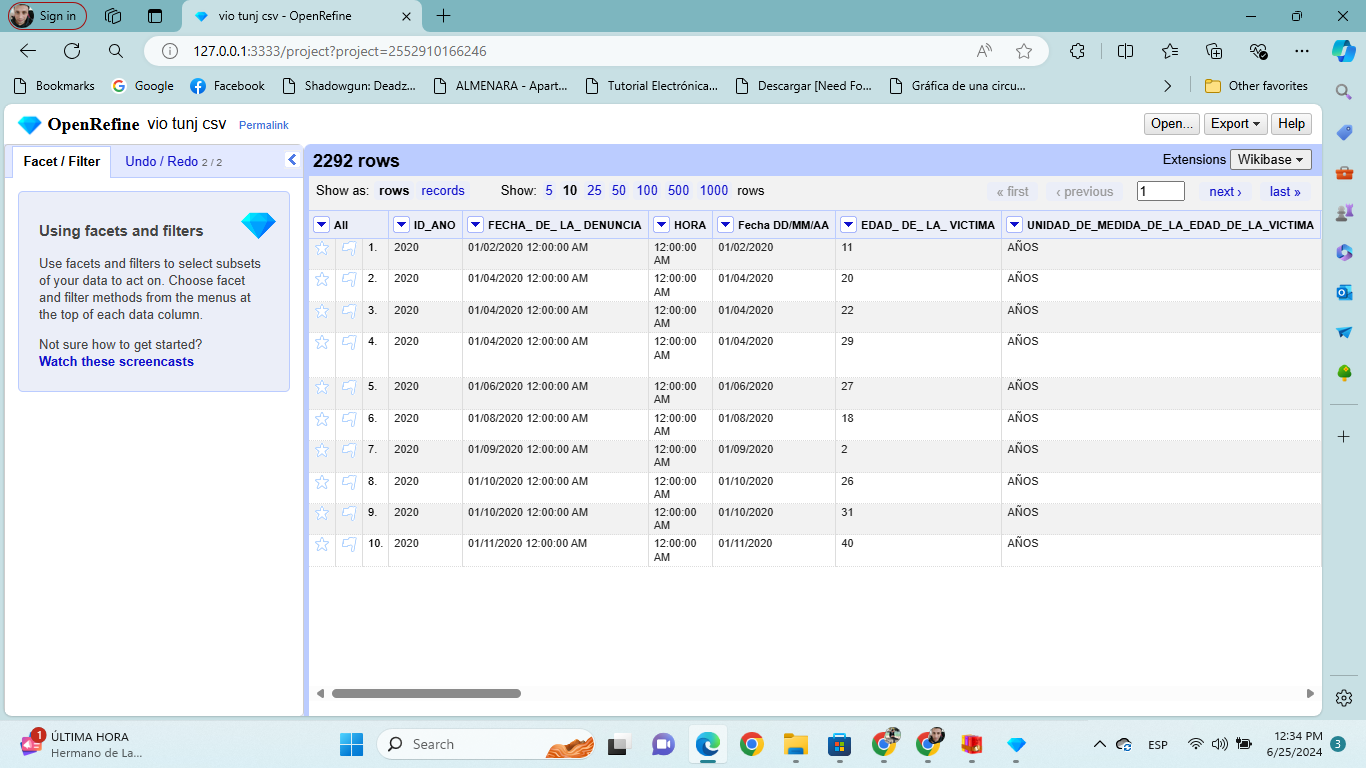

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

#INTRODUCCIÓN
Este proyecto ofrece un análisis detallado de los casos de violencia de género reportados en la capital de Tunja, utilizando diversas variables clave como el *estrato social*, *el género de la víctima*, *el género del agresor* y su **relación con la víctima**, así como *la fecha de la denuncia*. Los datos utilizados en este análisis provienen de la página oficial de Datos Abiertos Colombia, lo que garantiza la precisión y la confiabilidad de la información presentada.

#Datos extraídos de la página oficial de pro familia.

https://profamilia.org.co/aprende/violencia-de-genero/

---



In [3]:
import requests
from bs4 import BeautifulSoup
import time
from lxml import etree

urls = ['https://profamilia.org.co/aprende/violencia-de-genero/']
archivo_datos = 'datos_extraidos_parrafo.txt'

with open(archivo_datos, 'w', encoding='utf-8') as file:
    for url in urls:
        try:
            result = requests.get(url)

            if result.status_code == 200:
                soup = BeautifulSoup(result.text, 'lxml')

                # Extraer el título
                titulo = soup.find('title').get_text(strip=True)
                file.write('Título: ' + titulo + '\n')

                # Convertir el contenido a un objeto lxml para usar XPath
                dom = etree.HTML(str(soup))

# Extraer el contenido del párrafo usando XPath
                parrafo = dom.xpath('//*[@id="viewport"]/section[1]/div[2]/div[1]/div//text()')

                if parrafo:
                    contenido_parrafo = ' '.join(parrafo).strip()
                    file.write('Contenido del párrafo: ' + contenido_parrafo + '\n')
                else:
                    file.write('No se encontró el párrafo especificado.\n')
            else:
                print(f'Error al acceder a {url}: Código de estado {result.status_code}')

            time.sleep(1)

        except Exception as e:
            print(f'Ocurrió un error al procesar {url}: {e}')

print(f'Datos extraídos correctamente en {archivo_datos}')

Datos extraídos correctamente en datos_extraidos_parrafo.txt


In [57]:
with open('datos_extraidos_parrafo.txt', 'r') as file:
    contenido = file.read()

print(contenido)

Título: Violencia de género
Contenido del párrafo: Violencia es todo acto, acción u omisión que produzca daño o sufrimiento físico, sexual, psicológico, verbal, o económico a una persona; puede ocurrir en público o en privado. Las situaciones violentas ocurren cada vez que una persona impone su poder sobre otra vulnerando sus derechos.  
 Estas agresiones son ejercidas contra cualquier persona o grupo de personas sobre la base de su sexo o género. Las violencias impactan de manera negativa en su identidad y bienestar social, físico, psicológico o económico. Es importante tener en cuenta que las diferentes formas de violencia pueden iniciar con manifestaciones muy sutiles que van aumentando con la posibilidad de producir daños físicos o emocionales irreparables, e incluso, la muerte. 
 En Profamilia contamos con un modelo de servicio y atención integral para la recuperación de la salud física, emocional y social de las víctimas de cualquier forma de violencia, en especial de violencia s

#Desarrollo analitico sobre la basa de datos:
##Violencia de genero en Tunja

**Importación de Librerias**



In [4]:
import pandas as pd
import numpy as np
from pickle import TRUE
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

*Documentos del Repositorio Github*

In [5]:
# Extraccion de los dataset desde Github
url_1 = 'https://raw.githubusercontent.com/willycoy/Violencia_Tunja/main/vio_tunj.csv'
url_2 = 'https://raw.githubusercontent.com/willycoy/Violencia_Tunja/main/INFO_BARRIOS.csv'


# Variables para los dataset
data = pd.read_csv(url_1)
info_barrio = pd.read_csv(url_2)
data.head()


,ID_ANO,FECHA_ DE_ LA_ DENUNCIA,EDAD_ DE_ LA_ VICTIMA,UNIDAD_DE_MEDIDA_DE_LA_EDAD_DE_LA_VICTIMA,SEXO_ DE_ LA_ VICTIMA,AREA_ DE_ RESIDENCIA_ DE_ LA_ VICTIMA,BARRIO_ DE_ LA_ VICTIMA,SEGURIDAD_ SOCIAL_ DE_ LA_ VICTIMA,ESTRATO_SOCIECONOMICO_ DE_ LA_ VICTIMA,ORIENTACION_ SEXUAL_ DE _LA_ VICTIMA,...,ANTECEDENTES_ DE_ VIOLENCIA,PRESENCIA _DE_ ALCOHOL_ U_ OTRAS_ SUSTANCIAS,SEXO_ DEL_ AGRESOR,RELACION_ CON_ LA_ VICTIMA,CONVIVE_ CON_ EL_ AGRESOR,RELACION_ NO_ FAMILIAR,MECANISMO_ UTILIZADO_ PARA_ LA_ AGRESION,FECHA_ DEL_ HECHO,ESCENARIO,AMBITO_ O_ LUGAR
0,2020,01/02/2020 12:00:00 AM,11,AÑOS,MASCULINO,CABECERA MUNICIPAL,COLINAS DE SUE,CONTRIBUTIVO,3.0,HETEROSEXUAL,...,NO,SI,MASCULINO,PAREJA,SI,NO,CONTUNDENTE,01/01/2020 12:00:00 AM,OTRO,OTROS AMBITOS
1,2020,01/04/2020 12:00:00 AM,20,AÑOS,FEMENINO,CABECERA MUNICIPAL,SANTA LUCIA,SUBSIDIADO,2.0,HETEROSEXUAL,...,NO,NO,MASCULINO,EX PAREJA,NO,NO,CONTUNDENTE,01/02/2020 12:00:00 AM,VÍA PUBLICA,OTROS AMBITOS
2,2020,01/04/2020 12:00:00 AM,22,AÑOS,FEMENINO,RURAL DISPERSO,LA CABAÑA,SUBSIDIADO,2.0,HETEROSEXUAL,...,SI,NO,MASCULINO,PAREJA,SI,NO,CONTUNDENTE,01/04/2020 12:00:00 AM,VIVIENDA,HOGAR
3,2020,01/04/2020 12:00:00 AM,29,AÑOS,FEMENINO,CABECERA MUNICIPAL,LAS NIEVES,SUBSIDIADO,1.0,HETEROSEXUAL,...,NO,NO,MASCULINO,PAREJA,SI,NO,AHORCAMIENTO,09/20/2019 12:00:00 AM,OTROS ESPACIOS ABIERTOS,OTROS AMBITOS
4,2020,01/06/2020 12:00:00 AM,27,AÑOS,FEMENINO,CABECERA MUNICIPAL,EL CURUBAL,CONTRIBUTIVO,2.0,HETEROSEXUAL,...,SI,NO,MASCULINO,PAREJA,SI,NO,CONTUNDENTE,01/06/2020 12:00:00 AM,VIVIENDA,HOGAR


**Lectura del DataFrame**

In [6]:
# Informacion general del dataset Violencia de Genero en Tunja
data_info = data.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292 entries, 0 to 2291
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID_ANO                                        2292 non-null   int64  
 1   FECHA_ DE_ LA_ DENUNCIA                       2292 non-null   object 
 2   EDAD_ DE_ LA_ VICTIMA                         2292 non-null   int64  
 3   UNIDAD_DE_MEDIDA_DE_LA_EDAD_DE_LA_VICTIMA     2292 non-null   object 
 4   SEXO_ DE_ LA_ VICTIMA                         2292 non-null   object 
 5   AREA_ DE_ RESIDENCIA_ DE_ LA_ VICTIMA         2292 non-null   object 
 6   BARRIO_ DE_ LA_ VICTIMA                       2292 non-null   object 
 7   SEGURIDAD_ SOCIAL_ DE_ LA_ VICTIMA            2292 non-null   object 
 8   ESTRATO_SOCIECONOMICO_ DE_ LA_ VICTIMA        2291 non-null   float64
 9   ORIENTACION_ SEXUAL_ DE _LA_ VICTIMA          2292 non-null   o

*Dimensiones del Dataset*

In [7]:
data.shape

(2292, 23)



---



*LIMIPIEZA DEL DATASET*

In [8]:
# Eliminacion del espacio en blanco en el nombre de las columnas
data.columns = [col.strip().replace(' ', '_').upper() for col in data.columns]
data.columns

Index(['ID_ANO', 'FECHA__DE__LA__DENUNCIA', 'EDAD__DE__LA__VICTIMA',
       'UNIDAD_DE_MEDIDA_DE_LA_EDAD_DE_LA_VICTIMA', 'SEXO__DE__LA__VICTIMA',
       'AREA__DE__RESIDENCIA__DE__LA__VICTIMA', 'BARRIO__DE__LA__VICTIMA',
       'SEGURIDAD__SOCIAL__DE__LA__VICTIMA',
       'ESTRATO_SOCIECONOMICO__DE__LA__VICTIMA',
       'ORIENTACION__SEXUAL__DE__LA__VICTIMA',
       'IDENTIDAD__DE__GENERO__DE__LA__VICTIMA',
       'CONSUMO__DE__SPA__DE__LA__VICTIMA',
       'VICTIMA__CON__JEFATURA__DE__HOGAR', 'ANTECEDENTES__DE__VIOLENCIA',
       'PRESENCIA__DE__ALCOHOL__U__OTRAS__SUSTANCIAS', 'SEXO__DEL__AGRESOR',
       'RELACION__CON__LA__VICTIMA', 'CONVIVE__CON__EL__AGRESOR',
       'RELACION__NO__FAMILIAR', 'MECANISMO__UTILIZADO__PARA__LA__AGRESION',
       'FECHA__DEL__HECHO', 'ESCENARIO', 'AMBITO__O__LUGAR'],
      dtype='object')

In [9]:
data.columns = [col.replace('__','_') for col in data.columns]
data.columns

Index(['ID_ANO', 'FECHA_DE_LA_DENUNCIA', 'EDAD_DE_LA_VICTIMA',
       'UNIDAD_DE_MEDIDA_DE_LA_EDAD_DE_LA_VICTIMA', 'SEXO_DE_LA_VICTIMA',
       'AREA_DE_RESIDENCIA_DE_LA_VICTIMA', 'BARRIO_DE_LA_VICTIMA',
       'SEGURIDAD_SOCIAL_DE_LA_VICTIMA', 'ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA',
       'ORIENTACION_SEXUAL_DE_LA_VICTIMA', 'IDENTIDAD_DE_GENERO_DE_LA_VICTIMA',
       'CONSUMO_DE_SPA_DE_LA_VICTIMA', 'VICTIMA_CON_JEFATURA_DE_HOGAR',
       'ANTECEDENTES_DE_VIOLENCIA', 'PRESENCIA_DE_ALCOHOL_U_OTRAS_SUSTANCIAS',
       'SEXO_DEL_AGRESOR', 'RELACION_CON_LA_VICTIMA', 'CONVIVE_CON_EL_AGRESOR',
       'RELACION_NO_FAMILIAR', 'MECANISMO_UTILIZADO_PARA_LA_AGRESION',
       'FECHA_DEL_HECHO', 'ESCENARIO', 'AMBITO_O_LUGAR'],
      dtype='object')

In [10]:
data.columns

Index(['ID_ANO', 'FECHA_DE_LA_DENUNCIA', 'EDAD_DE_LA_VICTIMA',
       'UNIDAD_DE_MEDIDA_DE_LA_EDAD_DE_LA_VICTIMA', 'SEXO_DE_LA_VICTIMA',
       'AREA_DE_RESIDENCIA_DE_LA_VICTIMA', 'BARRIO_DE_LA_VICTIMA',
       'SEGURIDAD_SOCIAL_DE_LA_VICTIMA', 'ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA',
       'ORIENTACION_SEXUAL_DE_LA_VICTIMA', 'IDENTIDAD_DE_GENERO_DE_LA_VICTIMA',
       'CONSUMO_DE_SPA_DE_LA_VICTIMA', 'VICTIMA_CON_JEFATURA_DE_HOGAR',
       'ANTECEDENTES_DE_VIOLENCIA', 'PRESENCIA_DE_ALCOHOL_U_OTRAS_SUSTANCIAS',
       'SEXO_DEL_AGRESOR', 'RELACION_CON_LA_VICTIMA', 'CONVIVE_CON_EL_AGRESOR',
       'RELACION_NO_FAMILIAR', 'MECANISMO_UTILIZADO_PARA_LA_AGRESION',
       'FECHA_DEL_HECHO', 'ESCENARIO', 'AMBITO_O_LUGAR'],
      dtype='object')

In [11]:
data.shape

(2292, 23)

In [12]:
# Busque de valores NULL
null_values = data.isnull().sum()
null_values

,0
ID_ANO,0
FECHA_DE_LA_DENUNCIA,0
EDAD_DE_LA_VICTIMA,0
UNIDAD_DE_MEDIDA_DE_LA_EDAD_DE_LA_VICTIMA,0
SEXO_DE_LA_VICTIMA,0
AREA_DE_RESIDENCIA_DE_LA_VICTIMA,0
BARRIO_DE_LA_VICTIMA,0
SEGURIDAD_SOCIAL_DE_LA_VICTIMA,0
ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA,1
ORIENTACION_SEXUAL_DE_LA_VICTIMA,0


*lIMIPIEZA DE DATOS NULOS*

In [13]:
data1 = data.dropna().copy()
data1.shape

(2290, 23)

In [14]:
datasinull = data1.copy()
datasinull.tail()

,ID_ANO,FECHA_DE_LA_DENUNCIA,EDAD_DE_LA_VICTIMA,UNIDAD_DE_MEDIDA_DE_LA_EDAD_DE_LA_VICTIMA,SEXO_DE_LA_VICTIMA,AREA_DE_RESIDENCIA_DE_LA_VICTIMA,BARRIO_DE_LA_VICTIMA,SEGURIDAD_SOCIAL_DE_LA_VICTIMA,ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA,ORIENTACION_SEXUAL_DE_LA_VICTIMA,...,ANTECEDENTES_DE_VIOLENCIA,PRESENCIA_DE_ALCOHOL_U_OTRAS_SUSTANCIAS,SEXO_DEL_AGRESOR,RELACION_CON_LA_VICTIMA,CONVIVE_CON_EL_AGRESOR,RELACION_NO_FAMILIAR,MECANISMO_UTILIZADO_PARA_LA_AGRESION,FECHA_DEL_HECHO,ESCENARIO,AMBITO_O_LUGAR
2287,2024,03/30/2024 12:00:00 AM,17,AÑOS,FEMENINO,CABECERA MUNICIPAL,EL PARAISO,CONTRIBUTIVO,3.0,HETEROSEXUAL,...,NO,NO,FEMENINO,MADRE,SI,NO APLICA,CONTUNDENTE,03/30/2024 12:00:00 AM,VIVIENDA,HOGAR
2288,2024,03/30/2024 12:00:00 AM,9,AÑOS,MASCULINO,CABECERA MUNICIPAL,JOSE JOAQUIN CAMACHO,CONTRIBUTIVO,3.0,ASEXUAL,...,NO,NO,MASCULINO,NINGUNO,NO,COMPAÑERO(A) DE ESTUDIO,OTROS MECANISMOS,02/05/2024 12:00:00 AM,ESTABLECIMIENTO EDUCATIVO,ESCOLAR
2289,2024,03/31/2024 12:00:00 AM,31,AÑOS,FEMENINO,CABECERA MUNICIPAL,EL DORADO,CONTRIBUTIVO,1.0,HETEROSEXUAL,...,SI,NO,MASCULINO,PAREJA,SI,NO APLICA,CONTUNDENTE,03/30/2024 12:00:00 AM,VIVIENDA,HOGAR
2290,2024,03/31/2024 12:00:00 AM,38,AÑOS,FEMENINO,RURAL DISPERSO,RUNTA,SUBSIDIADO,1.0,HETEROSEXUAL,...,NO,NO,MASCULINO,PAREJA,SI,NO APLICA,CONTUNDENTE,03/31/2024 12:00:00 AM,VIVIENDA,HOGAR
2291,2024,03/31/2024 12:00:00 AM,9,AÑOS,FEMENINO,CABECERA MUNICIPAL,EL DORADO,CONTRIBUTIVO,1.0,ASEXUAL,...,NO,NO,FEMENINO,MADRE,SI,NO APLICA,OTROS MECANISMOS,03/31/2024 12:00:00 AM,VIVIENDA,HOGAR


**Conversion de object a datatime64 en la columna FECHA_DE_LA_DENUNCIA**

In [54]:
datasinull['FECHA_DE_LA_DENUNCIA'] = datasinull['FECHA_DE_LA_DENUNCIA'].astype(str)
datasinull['FECHA_DEL_HECHO'] = datasinull['FECHA_DEL_HECHO'].astype(str)
datasinulls = datasinull.copy()
datasinulls['FECHA_DE_LA_DENUNCIA'] = datasinulls['FECHA_DE_LA_DENUNCIA'].str.split(' ').str[0]
datasinulls['FECHA_DEL_HECHO'] = datasinulls['FECHA_DEL_HECHO'].str.split(' ').str[0]

datasinulls['FECHA_DE_LA_DENUNCIA'] = pd.to_datetime(datasinulls['FECHA_DE_LA_DENUNCIA'], format='%m/%d/%Y', errors='coerce')
datasinulls['FECHA_DEL_HECHO'] = pd.to_datetime(datasinulls['FECHA_DEL_HECHO'], format='%m/%d/%Y', errors='coerce')
datasinulls.head()

,ID_ANO,FECHA_DE_LA_DENUNCIA,EDAD_DE_LA_VICTIMA,UNIDAD_DE_MEDIDA_DE_LA_EDAD_DE_LA_VICTIMA,SEXO_DE_LA_VICTIMA,AREA_DE_RESIDENCIA_DE_LA_VICTIMA,BARRIO_DE_LA_VICTIMA,SEGURIDAD_SOCIAL_DE_LA_VICTIMA,ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA,ORIENTACION_SEXUAL_DE_LA_VICTIMA,...,ANTECEDENTES_DE_VIOLENCIA,PRESENCIA_DE_ALCOHOL_U_OTRAS_SUSTANCIAS,SEXO_DEL_AGRESOR,RELACION_CON_LA_VICTIMA,CONVIVE_CON_EL_AGRESOR,RELACION_NO_FAMILIAR,MECANISMO_UTILIZADO_PARA_LA_AGRESION,FECHA_DEL_HECHO,ESCENARIO,AMBITO_O_LUGAR
0,2020,2020-01-02,11,AÑOS,MASCULINO,CABECERA MUNICIPAL,COLINAS DE SUE,CONTRIBUTIVO,3.0,HETEROSEXUAL,...,NO,SI,MASCULINO,PAREJA,SI,NO,CONTUNDENTE,2020-01-01,OTRO,OTROS AMBITOS
1,2020,2020-01-04,20,AÑOS,FEMENINO,CABECERA MUNICIPAL,SANTA LUCIA,SUBSIDIADO,2.0,HETEROSEXUAL,...,NO,NO,MASCULINO,EX PAREJA,NO,NO,CONTUNDENTE,2020-01-02,VÍA PUBLICA,OTROS AMBITOS
2,2020,2020-01-04,22,AÑOS,FEMENINO,RURAL DISPERSO,LA CABAÑA,SUBSIDIADO,2.0,HETEROSEXUAL,...,SI,NO,MASCULINO,PAREJA,SI,NO,CONTUNDENTE,2020-01-04,VIVIENDA,HOGAR
3,2020,2020-01-04,29,AÑOS,FEMENINO,CABECERA MUNICIPAL,LAS NIEVES,SUBSIDIADO,1.0,HETEROSEXUAL,...,NO,NO,MASCULINO,PAREJA,SI,NO,AHORCAMIENTO,2019-09-20,OTROS ESPACIOS ABIERTOS,OTROS AMBITOS
4,2020,2020-01-06,27,AÑOS,FEMENINO,CABECERA MUNICIPAL,EL CURUBAL,CONTRIBUTIVO,2.0,HETEROSEXUAL,...,SI,NO,MASCULINO,PAREJA,SI,NO,CONTUNDENTE,2020-01-06,VIVIENDA,HOGAR




---



# VIOLENCIA DE GENERO

In [55]:
dta1 = datasinulls['SEXO_DE_LA_VICTIMA'].value_counts()
dta1 = dta1.reset_index()
dta1.columns=['Genero', 'Total']
dta1

,Genero,Total
0,FEMENINO,1918
1,MASCULINO,372


<ipython-input-56-3787b2246a22>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-56-3787b2246a22>:4: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.



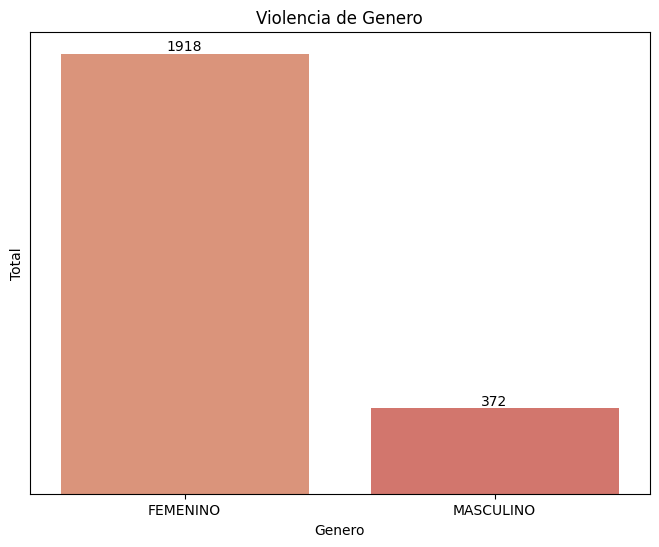

In [56]:
# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette('flare')
sns.barplot(x='Genero', y='Total', data=dta1,
            palette=colors,
            estimator='sum', errorbar=None)
for container in ax.containers:
    ax.bar_label(container)
plt.yticks([])


# Agregar etiquetas y título
plt.xlabel('Genero')
plt.ylabel('Total')
plt.title('Violencia de Genero')
plt.show()

#Conclusión:

En el gráfico de barras sobre Violencia de Género en Tunja, se evidencia que la mayoría de los casos denunciados corresponden a víctimas de género femenino, con un total de 1,918 reportes. Sin embargo, también se observa la presencia de casos de violencia de género masculino, que, aunque en menor proporción, suman un total de 372 denuncias. Este contraste resalta la prevalencia de la violencia de género en mujeres, al tiempo que visibiliza la necesidad de abordar y prevenir también la violencia hacia hombres.

# DESCRIPCION DE CASOS DE VICTA DE GENERO EN LA CAPITAL DE TUNJA

In [18]:
edad_victima_distribution = datasinulls['EDAD_DE_LA_VICTIMA'].describe()
edad_victima_distribution

,EDAD_DE_LA_VICTIMA
count,2290.000000
mean,26.523581
std,15.477054
min,1.000000
25%,15.000000
50%,24.000000
75%,35.000000
max,91.000000


Conclusión:
- En la descripción del Dataset sobre *Casos de Violencia de Genero en Tunja*, una de las cantidades descriptivas es la edad minimi y maxima en la cual se registra agresion desde el primer año de vida hasta los 91 años.

- De los 2.290 casos de violencia de genero, denunciados en la capital de Tunja, la mayoria de casos se presentan entre los 24 años de edad.

# RELACION PARENTAL DE LA VICTMA

En este apartado se presenta un análisis entre la victima y relacion parental con el agresor, a través de los graficos de barra y pastel.

In [50]:
datasinulls['RELACION_CON_LA_VICTIMA'] = datasinulls['RELACION_CON_LA_VICTIMA'].replace(['EX PAREJA', 'EXPAREJA'], 'EXPAREJA').copy()
datasinulls['RELACION_CON_LA_VICTIMA'] = datasinulls['RELACION_CON_LA_VICTIMA'].replace(['FAMLIAR', 'FAMILIAR'], 'FAMILIAR').copy()
relacion_victima_distribution = datasinulls['RELACION_CON_LA_VICTIMA'].value_counts()
relacion_victima_distribution = relacion_victima_distribution.reset_index()
relacion_victima_distribution = pd.DataFrame(relacion_victima_distribution)
relacion_victima_distribution.columns = ['Relacion con la Victima', 'Total']
relacion_victima_distribution

,Relacion con la Victima,Total
0,PAREJA,743
1,NINGUNO,504
2,FAMILIAR,448
3,EXPAREJA,292
4,PADRE,169
5,MADRE,134


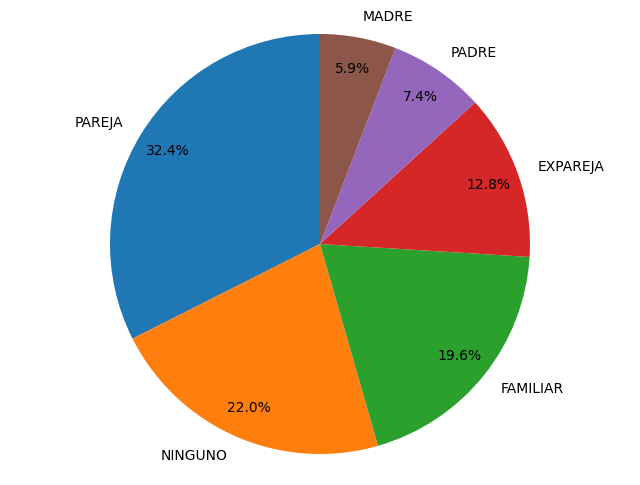

In [51]:


relacion_victima_distribution_1 = relacion_victima_distribution.iloc[0:6,]


labels = relacion_victima_distribution_1['Relacion con la Victima']
sizes = relacion_victima_distribution_1['Total']


fig, ax = plt.subplots(figsize=(8, 6))


ax.pie(sizes, labels=labels, autopct='%1.1f%%',
       pctdistance=0.85, labeldistance=1.1,
       startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

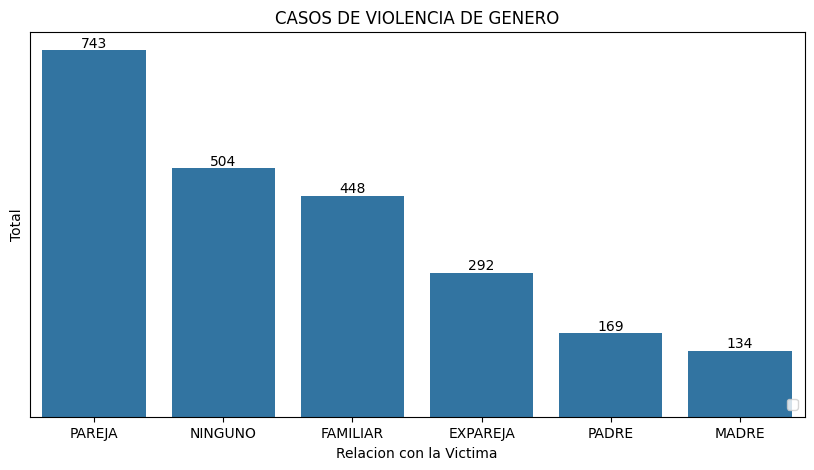

In [52]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Relacion con la Victima', y='Total', data=relacion_victima_distribution,
            estimator='sum',
            errorbar=None)
ax.bar_label(ax.containers[0])
plt.yticks([])

# Agregar etiquetas y título
plt.ylabel('Total')
plt.title('CASOS DE VIOLENCIA DE GENERO')
plt.legend(loc='lower right')
plt.show()
# quitar valores eje y

#CONCLUSION:

En el análisis de los casos de violencia de género en la capital de Tunja, se observa que la principal fuente de agresión proviene de la pareja actual, lo que resalta la prevalencia de este tipo de violencia en las relaciones íntimas. Sin embargo, es importante destacar que la violencia ejercida por exparejas también presenta cifras alarmantes, lo que subraya la persistencia de patrones de abuso incluso después de la ruptura de la relación. Este panorama revela la necesidad de intervenciones específicas tanto para prevenir la violencia en relaciones actuales como para proteger a las víctimas de agresiones continuas por parte de exparejas

#*ESCENARIOS DE VIOLENCIA*          

A continuacion se presenta un análisis sobre los escenarios donde se presenta con mayor frecuencia la violencia de genero en Tunja.

In [24]:
datasinulls['ESCENARIO'] = datasinulls['ESCENARIO'].replace(['VIA PUBLICA', 'VÍA PUBLICA'], 'VÍA PUBLICA').copy()
escenario_distribucion = datasinulls['ESCENARIO'].value_counts()
escenario_distribucion = escenario_distribucion.reset_index()
escenario_distribucion = pd.DataFrame(escenario_distribucion)
escenario_distribucion.columns = ['ESCENARIO', 'Total']

escenario_distribucion


,ESCENARIO,Total
0,VIVIENDA,1753
1,VÍA PUBLICA,180
2,OTRO,156
3,ESTABLECIMIENTO EDUCATIVO,41
4,LUGAR DE TRABAJO,30
5,VIA PULBICA,28
6,OTROS ESPACIOS ABIERTOS,19
7,VÍA PÚBLICA,16
8,COMERCIO Y AREAS DE SERVICIOS,12
9,COMERCIO,10


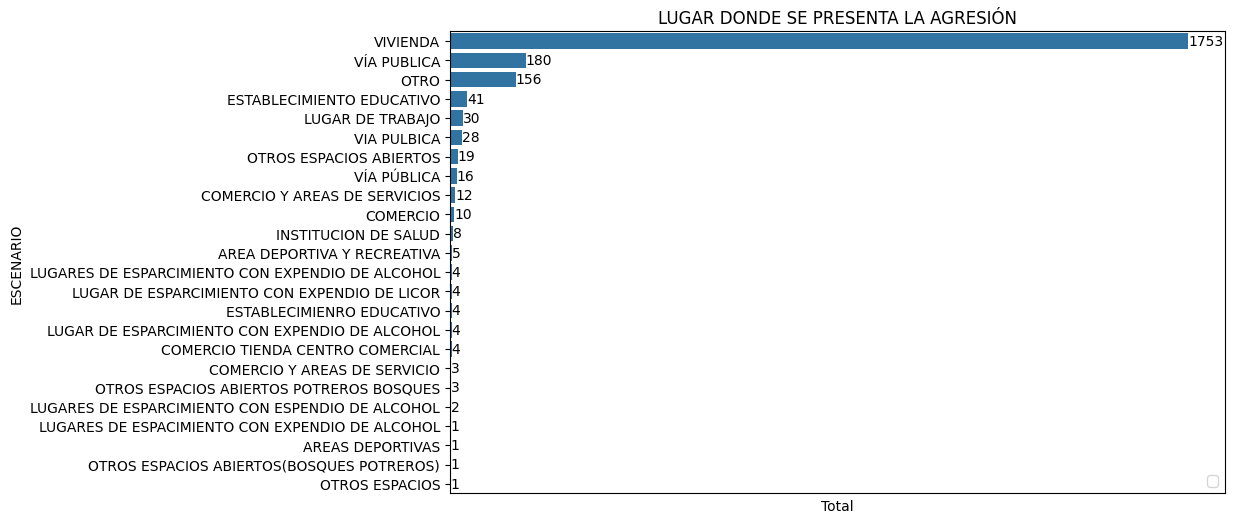

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Total', y='ESCENARIO', data=escenario_distribucion,
            estimator='sum',
            errorbar=None)
ax.bar_label(ax.containers[0])
plt.xticks([])

plt.title('LUGAR DONDE SE PRESENTA LA AGRESIÓN')
plt.legend(loc='lower right')
plt.yticks(rotation=0)
plt.show()

#Conclusión

O



#TENDENCIA DE LOS CASOS DE VIOLENCIA DE GENERO

<ipython-input-27-a72bbf8e04f6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=incident_trends, x='Fecha', y='Total', palette='flare')


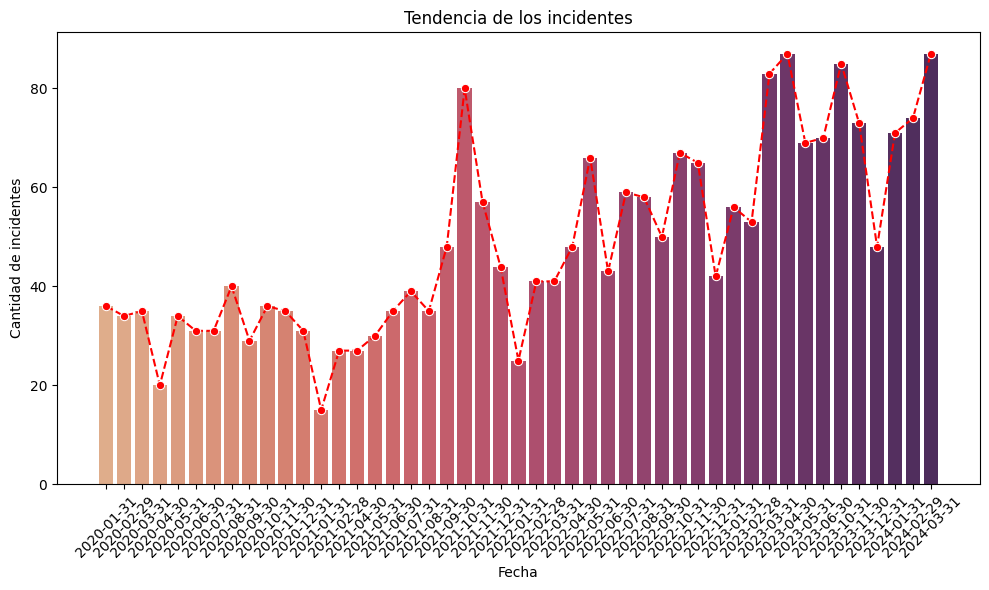

In [27]:
incident_trends = datasinulls['FECHA_DE_LA_DENUNCIA'].dt.to_period('M').value_counts().sort_index()
incident_trends = incident_trends.reset_index()
incident_trends = incident_trends[incident_trends['FECHA_DE_LA_DENUNCIA'] >= '2020-01']
incident_trends.columns = ['Fecha', 'Total']
incident_trends = pd.DataFrame(incident_trends)
incident_trends

# Convertir la columna 'Fecha' al tipo timestamp
incident_trends['Fecha'] = incident_trends['Fecha'].dt.strftime('%Y-%m-%d')

# Graficar el histograma
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=incident_trends, x='Fecha', y='Total', palette='flare')
sns.lineplot(data=incident_trends, x='Fecha', y='Total', color='red', linestyle='--', marker='o', markers=8)
plt.xticks(rotation=45)
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de incidentes')#
ax.set_title('Tendencia de los incidentes')
plt.tight_layout()
plt.show()


In [28]:
datasinulls['FECHA_DE_LA_DENUNCIA'] = datasinulls['FECHA_DE_LA_DENUNCIA'].dt.year
conteo = datasinulls.groupby(['FECHA_DE_LA_DENUNCIA', 'SEXO_DE_LA_VICTIMA']).size().reset_index(name='Total')
conteo

,FECHA_DE_LA_DENUNCIA,SEXO_DE_LA_VICTIMA,Total
0,2020,FEMENINO,335
1,2020,MASCULINO,57
2,2021,FEMENINO,382
3,2021,MASCULINO,55
4,2022,FEMENINO,504
5,2022,MASCULINO,101
6,2023,FEMENINO,515
7,2023,MASCULINO,109
8,2024,FEMENINO,182
9,2024,MASCULINO,50


In [29]:
!pip install seaborn --upgrade
!pip install matplotlib --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 29.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


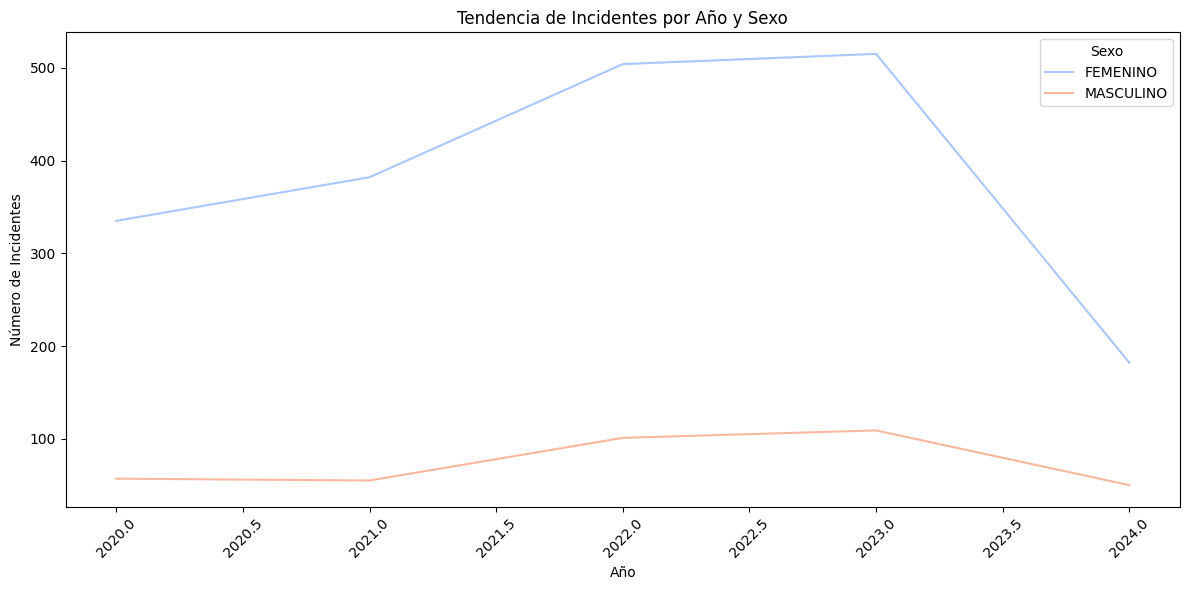

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=conteo, x='FECHA_DE_LA_DENUNCIA', y='Total', hue='SEXO_DE_LA_VICTIMA', palette='coolwarm')
plt.title('Tendencia de Incidentes por Año y Sexo')
plt.xlabel('Año')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

In [31]:
import seaborn as sns
print(sns.__version__)

0.13.1


In [32]:
!pip install seaborn==0.13.2

#Dataset Estrato social y Genero:          

*Genero y Estrato Social*

A continuacion se presenta una la extreaccion de y analisis del dataset *VIOLENCIA DE GENETO EN TUNJA*, en la cual se realiza entre las caterias de estrato social y genero de la victima

In [33]:
est_ = datasinulls[['SEXO_DE_LA_VICTIMA', 'ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']].copy()
est_m = est_[est_['SEXO_DE_LA_VICTIMA']=='MASCULINO']
est_f = est_[est_['SEXO_DE_LA_VICTIMA']=='FEMENINO']
#Estrado 0
est_0_m =  est_m[est_m['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==0].shape[0]
est_0_f =  est_f[est_f['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==0].shape[0]
#Estrado 1
est_1_m =  est_m[est_m['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==1].shape[0]
est_1_f =  est_f[est_f['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==1].shape[0]
#Estrado 2
est_2_m =  est_m[est_m['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==2].shape[0]
est_2_f =  est_f[est_f['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==2].shape[0]
#Estrado 3
est_3_m =  est_m[est_m['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==3].shape[0]
est_3_f =  est_f[est_f['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==3].shape[0]
#Estrado 4
est_4_m =  est_m[est_m['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==4].shape[0]
est_4_f =  est_f[est_f['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==4].shape[0]
#Estrado 5
est_5_m =  est_m[est_m['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==5].shape[0]
est_5_f =  est_f[est_f['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==5].shape[0]
#Estrado 6
est_6_m =  est_m[est_m['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==6].shape[0]
est_6_f =  est_f[est_f['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==6].shape[0]

# Nuevo DataFrame sobre estrato y genero
EST_2 = {

    'ESTRATO'  : [0, 1, 2, 3, 4, 5, 6],
    'MASCULINO': [est_0_m, est_1_m, est_2_m, est_3_m, est_4_m, est_5_m, est_6_m],
    'FEMENINO' : [est_0_f, est_1_f, est_2_f, est_3_f, est_4_f, est_5_f, est_6_f]
}
dta2 = pd.DataFrame(EST_2)
dta2

,ESTRATO,MASCULINO,FEMENINO
0,0,3,11
1,1,77,430
2,2,133,721
3,3,122,619
4,4,30,117
5,5,7,19
6,6,0,1


In [34]:
dta = pd.DataFrame(datasinulls).copy()

# Eliminar espacios adicionales en los nombres de las columnas
dta.columns = dta.columns.str.strip()

# Crear un diccionario para almacenar los conteos
est_counts_data = {'ESTRATO': [], 'MASCULINO': [], 'FEMENINO': []}

# Obtener valores únicos de estrato
estratos = sorted(dta['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA'].unique())

# Iterar sobre cada estrato y contar por género
for estrato in estratos:
    est_m = dta[(dta['SEXO_DE_LA_VICTIMA'] == 'MASCULINO') & (dta['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA'] == estrato)].shape[0]
    est_f = dta[(dta['SEXO_DE_LA_VICTIMA'] == 'FEMENINO') & (dta['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA'] == estrato)].shape[0]
    est_counts_data['ESTRATO'].append(estrato)
    est_counts_data['MASCULINO'].append(est_m)
    est_counts_data['FEMENINO'].append(est_f)

# Crear el DataFrame final
est_counts = pd.DataFrame(est_counts_data)

# Mostrar el DataFrame resultante
print(est_counts)

   ESTRATO  MASCULINO  FEMENINO
0      0.0          3        11
1      1.0         77       430
2      2.0        133       721
3      3.0        122       619
4      4.0         30       117
5      5.0          7        19
6      6.0          0         1


In [35]:
import plotly.express as px
fig = px.bar(dta2, x='ESTRATO', y=['MASCULINO', 'FEMENINO'], barmode='group')
fig.update_layout(
    title="Relacion entre Estrato y Genero",
    xaxis_title="Estrato",
    yaxis_title="Cantidad"
)
fig.show()

**DataFrame:**          *Frecuencia de edad por genero*

#Grafico rango de edad por genero

In [36]:

# Crear una copia del DataFrame con las columnas necesarias EDAD_DE_LA_VICTIMA
dta3 = datasinulls[['EDAD_DE_LA_VICTIMA', 'SEXO_DE_LA_VICTIMA']].copy()

# Crear rangos de edad con pd.cut
dta3['Rango_Edad'] = pd.cut(dta3['EDAD_DE_LA_VICTIMA'], 10)

# Agrupar por sexo y rango de edad, y contar el tamaño de cada grupo
f_dta3 = pd.DataFrame(dta3.groupby(['SEXO_DE_LA_VICTIMA', 'Rango_Edad']).size(), columns=['Cantidad'])

# Restablecer el índice para tener columnas separadas
f_dta3.reset_index(inplace=True)

# Pivotar la tabla para obtener las columnas separadas para cada sexo
pivot_df = f_dta3.pivot(index='Rango_Edad', columns='SEXO_DE_LA_VICTIMA', values='Cantidad')

# Restablecer el índice para que Rango_Edad sea una columna
pivot_df.reset_index(inplace=True)

# Renombrar las columnas para mayor claridad
pivot_df.columns.name = None  # Eliminar el nombre de las columnas
pivot_df.columns = ['Rango_Edad', 'Femenino', 'Masculino']

# Mostrar el DataFrame final
print(pivot_df)


     Rango_Edad  Femenino  Masculino
0  (0.91, 10.0]       147        100
1  (10.0, 19.0]       515        106
2  (19.0, 28.0]       505         51
3  (28.0, 37.0]       355         37
4  (37.0, 46.0]       194         36
5  (46.0, 55.0]       115         13
6  (55.0, 64.0]        36         12
7  (64.0, 73.0]        31          5
8  (73.0, 82.0]        17          8
9  (82.0, 91.0]         3          4


<ipython-input-36-7e844f4a2b99>:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [37]:
import plotly.express as px

# Convert 'Rango_Edad' to strings for Plotly compatibility
pivot_df['Rango_Edad'] = pivot_df['Rango_Edad'].astype(str)
Masculino = pivot_df['Masculino'].mean()
Femenino = pivot_df['Femenino']
fig = px.bar(pivot_df, x='Rango_Edad', y=['Femenino', 'Masculino'], barmode='group')
fig.show()
print(Masculino)
#cambiar orientacion del eje x

37.2


In [38]:
datasinulls.describe()

,ID_ANO,FECHA_DE_LA_DENUNCIA,EDAD_DE_LA_VICTIMA,ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA,FECHA_DEL_HECHO
count,2290.000000,2290.000000,2290.000000,2290.000000,2290
mean,2021.941921,2021.941921,26.523581,2.254148,2021-08-21 06:06:36.157205248
min,2020.000000,2020.000000,1.000000,0.000000,1981-04-01 00:00:00
25%,2021.000000,2021.000000,15.000000,2.000000,2021-01-17 06:00:00
50%,2022.000000,2022.000000,24.000000,2.000000,2022-04-07 12:00:00
75%,2023.000000,2023.000000,35.000000,3.000000,2023-03-01 00:00:00
max,2024.000000,2024.000000,91.000000,6.000000,2024-03-31 00:00:00
std,1.245223,1.245223,15.477054,0.933360,NaN


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Datos
cantidad_vs_años = datasinulls[['SEXO_DE_LA_VICTIMA', 'ID_ANO']]
cantidad_vs_años = cantidad_vs_años.groupby('ID_ANO').count()
cantidad_vs_años

,SEXO_DE_LA_VICTIMA
ID_ANO,
2020,392
2021,437
2022,605
2023,624
2024,232




---



#GRAFICOS GEOESPACIALES

##*Dataset:*
###Barrios con mayor frecuencia de casos de violencia de genero en Tunja

In [40]:

Barrios_victimas = data['BARRIO_DE_LA_VICTIMA'].value_counts()
Barrios_victimas = pd.DataFrame(Barrios_victimas)
Barrios_victimas = Barrios_victimas.reset_index()
Barrios_victimas.columns = ['barrio', 'Total']
Barrios_victimas

,barrio,Total
0,LIBERTADOR,114
1,ANTONIA SANTOS,96
2,CENTRO,87
3,ALTAMIRA,61
4,DOÑA EVA,58
...,...,...
282,VEREDA EL PORVENIR,1
283,LA SIBERIA,1
284,COJINES DEL SAQUE,1
285,NAZARET,1


In [41]:
barrio_victima = data.copy()

# Correccion de algunos datos sobre el BARRIO DE LA VICTIMA
barrio_victima['AREA_DE_RESIDENCIA_DE_LA_VICTIMA'] = barrio_victima['AREA_DE_RESIDENCIA_DE_LA_VICTIMA'].replace(['CABECERA MUNCIPAL', 'CABECERA MUNICIPAL'], 'CABECERA MUNICIPAL')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['20 JULIO', '20 DE JULIO'], '20 DE JULIO')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['20/07/2024', '20 DE JULIO'], '20 DE JULIO')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['ALAMEDA UNICENTRO', 'ALAMEDA'], 'ALAMEDA')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['ALAMEDA BOSQUE', 'ALAMEDA DEL BOSQUE'], 'ALAMEDA DEL BOSQUE')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['15 DE MAYO', 'QUINCE DE MAYO'], 'QUINCE DE MAYO')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['ALCALÁ REAL', 'ALCALA REAL'], 'ALCALA REAL')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['ASIS BOYASENCE', 'ASIS BOYACENSE'], 'ASIS BOYACENSE')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['ASIS', 'ASIS BOYACENSE'], 'ASIS BOYACENSE')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['BUENAVISTA', 'BUENA VISTA'], 'BUENA VISTA')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['BACHUE', 'VILLA BACHUE'], 'VILLA BACHUE')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['ALTOS DE CANAPRO', 'CANAPRO'], 'CANAPRO')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['ALTOS COOSERVICIOS', 'ALTOS DE COOSERVICIOS'], 'ALTOS DE COOSERVICIOS')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['ALTOS DE ARBOLEDA', 'ARBOLEDA'], 'ARBOLEDA')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['ALTOS DEL PARAISO', 'PARAISO'], 'PARAISO')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['COLINAS DEL ZUE', 'COLINAS DE ZUE'], 'COLINAS DEL ZUE')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['COLINAS DE SUE', 'COLINAS DEL ZUE'], 'COLINAS DEL ZUE')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['ALTOS DE ZUE', 'COLINAS DEL ZUE'], 'COLINAS DEL ZUE')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['CALLEJA', 'LA CALLEJA'], 'LA CALLEJA')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['LOS PATRIOTIAS', 'LOS PATRIOTAS'], 'LOS PATRIOTAS')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['MANZANARES', 'MANZANAREZ'], 'MANZANARES')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['ESTANCIA ROBLE', 'ESTANCIA EL ROBLE'], 'ESTANCIA EL ROBLE')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['CARMEN', 'EL CARMEN'], 'EL CARMEN')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['TRIUNFO', 'ALTOS DEL TRIUNFO'], 'ALTOS DEL TRIUNFO')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['AMERICAS', 'LAS AMERICAS'], 'LAS AMERICAS')
barrio_victima.drop(barrio_victima[barrio_victima['BARRIO_DE_LA_VICTIMA'] == 'ALTOS DE SAN DIEGO'].index, inplace=True)
barrio_victima.drop(barrio_victima[barrio_victima['BARRIO_DE_LA_VICTIMA'] == 'B SAN LAUREANO'].index, inplace=True)
barrio_victima.drop(barrio_victima[barrio_victima['BARRIO_DE_LA_VICTIMA'] == 'AMPARO DE NIÑOS'].index, inplace=True)
barrio_victima.drop(barrio_victima[barrio_victima['BARRIO_DE_LA_VICTIMA'] == 'ANDES'].index, inplace=True)
barrio_victima = barrio_victima[barrio_victima['AREA_DE_RESIDENCIA_DE_LA_VICTIMA'] == 'CABECERA MUNICIPAL']
# obtimizar con json diccionario

# Contamos la cantidad de victimas por barrios
barrio_victima = barrio_victima['BARRIO_DE_LA_VICTIMA'].value_counts()
barrio_victima = pd.DataFrame(barrio_victima)
barrio_victima = barrio_victima.reset_index()
barrio_victima.columns = ['barrio', 'Total']
barrio_victima.sort_values(by='Total', ascending=False)

,barrio,Total
0,LIBERTADOR,114
1,ANTONIA SANTOS,96
2,CENTRO,87
3,ALTAMIRA,61
4,DOÑA EVA,58
...,...,...
186,CASTILLOS DEL NORTE,1
185,REMANSOS DE SANTA INES,1
184,CHORRO BLANCO,1
182,PARQUES DE NOGAL,1


In [42]:
info_barrios = info_barrio.iloc[:,[1, 3, 4]]
info_barrios.sort_values(by='barrio', ascending=True)

,barrio,latitud,longitud
12,20 DE JULIO,5.542224,-73.362821
104,ALAMEDA,5.558434,-73.346814
105,ALAMEDA DEL BOSQUE,5.558434,-73.346814
106,ALCALA REAL,5.573531,-73.333912
107,ALTAGRACIA,5.557096,-73.342384
...,...,...,...
91,VILLA UNIVERSITARIA,5.548224,-73.356700
140,VILLAS DEL LAGO,5.571630,-73.333654
52,VILLAS DEL NORTE,5.570990,-73.345563
134,VILLITA,5.564305,-73.334835


In [43]:
barrio_total_victima = barrio_victima.merge(info_barrios, on='barrio', how='right')
barrio_total_victima.dropna(inplace=True)
barrio_total_victima.sort_values(by='Total', ascending=False)

,barrio,Total,latitud,longitud
1,LIBERTADOR,114.0,5.520352,-73.369682
3,ANTONIA SANTOS,96.0,5.512022,-73.366871
8,CENTRO,87.0,5.532325,-73.361635
4,ALTAMIRA,61.0,5.544016,-73.369274
5,DOÑA EVA,58.0,5.517639,-73.363717
...,...,...,...,...
95,POZO DE DONATO,1.0,5.551213,-73.353052
94,LA COLINA,1.0,5.554161,-73.358052
91,VILLA UNIVERSITARIA,1.0,5.548224,-73.356700
83,PRADO DE SAN LUIS,1.0,5.531501,-73.346057


In [44]:
import folium #importando dependencias del mapa
mapa_tunja = folium.Map(location=[5.538771, -73.357116], zoom_start=13) #creando el mapa

for index, row in barrio_total_victima.iterrows():
    folium.Marker([row['latitud'], row['longitud']], popup=row['barrio']).add_to(mapa_tunja)

mapa_tunja

In [45]:
import folium
from folium.plugins import HeatMap
locations = barrio_total_victima[['latitud', 'longitud', 'Total']].values.tolist()

tunja_map = folium.Map(location=[5.5450, -73.357116], zoom_start=13)
HeatMap(locations).add_to(tunja_map)
tunja_map

libertador = [
    [5.519458, -73.374286],
    [5.522664, -73.375435],
    [5.522368, -73.369882],
    [5.523404, -73.368418],
    [5.518348, -73.367560],
    [5.517851, -73.370070],
    [5.516345, -73.370532],
    [5.516627, -73.371405],
    [5.517282, -73.371725],
    [5.517515, -73.372886],
    [5.517429, -73.373302],
    [5.516447, -73.374399],
    [5.516345, -73.375196]
]

folium.Polygon(
    locations=libertador,
    color='blue',
    weight=4,
    fill_color='red',
    fill_opacity=0.2
).add_to(tunja_map)

tunja_map

##Conclusiones:


En el mapa de calor podemos evidenciar que la gran cantidad de casos de violencia de género se concentra en el centro de la capital de Tunja, con una alta tasa de frecuencia en el barrio libertador, el cual es descrito a través del dibujo poligonal del sector, a diferencia de la creencia que los hechos de violencia se generan en el perihelio de una ciudad, en este caso es diferente.

# REGRECION LINEAL SIMPLE EN COSAS DE VIOLENCIA DE GENERO

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


datasinulls['FECHA_DE_LA_DENUNCIA'] = pd.to_datetime(datasinulls['FECHA_DE_LA_DENUNCIA'], format='%d/%m/%Y', errors='coerce')
datasinulls['FECHA_DE_LA_DENUNCIA'] = (datasinulls['FECHA_DE_LA_DENUNCIA'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
datasinulls['SEXO_DE_LA_VICTIMA'] = datasinulls['SEXO_DE_LA_VICTIMA'].astype('category').cat.codes

X = datasinulls['FECHA_DE_LA_DENUNCIA'].values.reshape(-1, 1)  # Asegúrate de que X tiene la forma adecuada
y = datasinulls['SEXO_DE_LA_VICTIMA'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Paso 7: Visualizar los resultados
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Fecha del Hecho (numérica)')
plt.ylabel('Sexo de la Víctima (codificado)')
plt.title('Regresión Lineal')
plt.show()


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

#Informe Looker Studio
https://lookerstudio.google.com/reporting/40952b6c-2a1e-40c0-ad3e-0c5b0066ba4f/page/uVy7D